# <center> Data Science I: Foundations - Final Project

### <center> <font color='gray'>by Rahul Shrivastava, MS-DSPP '23</font> 

In [1]:
# Required Packages
import pandas as pd
import numpy as np

# Data Management/Investigation
import missingno as miss
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.naive_bayes import GaussianNB as NB # Classifier 
import statsmodels.formula.api as smf

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# Importing in the data
# Reading in the csv files
dta = pd.read_csv(r"Data\finsec-countries.csv", index_col=0)

dta.shape

(51, 32)

In [3]:
dta = dta.rename(columns={'FinSecGrowth_5Yrs': 'finsecgrowth'})

In [4]:
dta.head()

,cnt,country_name,year,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_api,v2x_mpi,...,v2xel_locelec,v2xel_regelec,v2xdl_delib,v2xeg_eqprotec,v2xeg_eqaccess,v2xeg_eqdr,country,var,Financial services,finsecgrowth
0,ARG,Argentina,2018,0.779,0.625,0.517,0.578,0.616,0.902,0.655,...,0.925,0.944,0.704,0.792,0.827,0.722,Argentina,VA_Q15,359619.883600,0.008064
1,BFA,Burkina Faso,2018,0.715,0.519,0.443,0.587,0.489,0.871,0.560,...,0.696,0.098,0.821,0.822,0.791,0.319,Burkina Faso,VA_Q15,179298.346400,0.107439
2,BGD,Bangladesh,2018,0.287,0.111,0.147,0.114,0.099,0.536,0.038,...,0.406,0.000,0.241,0.158,0.270,0.132,Bangladesh,VA_Q15,707330.263406,0.079621
3,BOL,Bolivia,2018,0.614,0.357,0.450,0.428,0.417,0.813,0.415,...,0.916,0.836,0.661,0.747,0.804,0.356,Bolivia,VA_Q15,14100.643250,0.084604
4,BRA,Brazil,2018,0.762,0.599,0.483,0.462,0.431,0.894,0.629,...,0.991,0.968,0.522,0.386,0.626,0.403,Brazil,VA_Q15,348834.959841,-0.012624


## Visualizing the Data

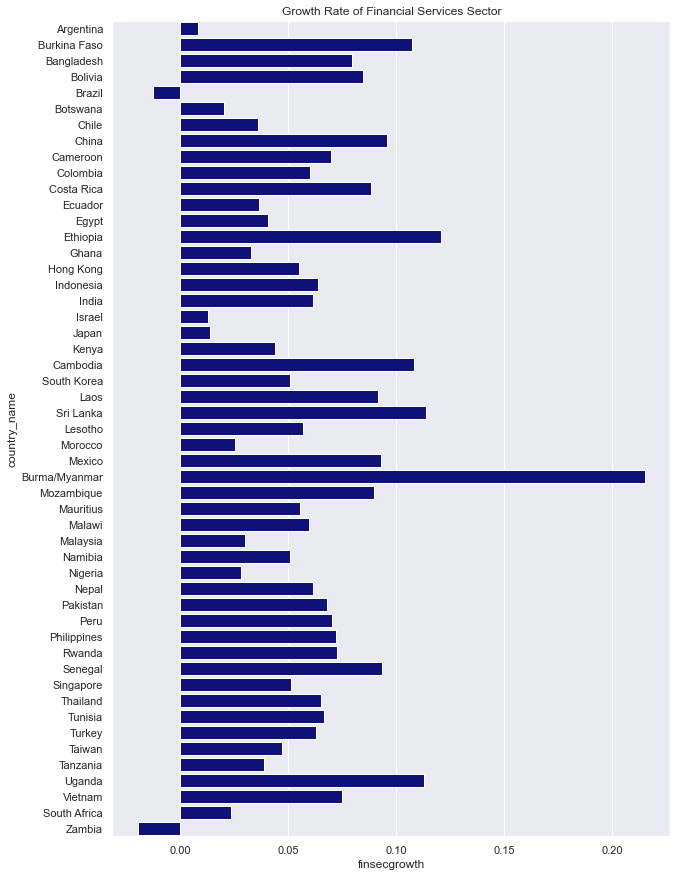

In [5]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 15))
bar1 = sns.barplot(y="country_name",  x="finsecgrowth", data=dta, color='darkblue')
plt.title('Growth Rate of Financial Services Sector')
plt.savefig('figure_1.png', dpi=300)
plt.show()

In [6]:
dta.dtypes

cnt                    object
country_name           object
year                    int64
v2x_polyarchy         float64
v2x_libdem            float64
v2x_partipdem         float64
v2x_delibdem          float64
v2x_egaldem           float64
v2x_api               float64
v2x_mpi               float64
v2x_freexp_altinf     float64
v2x_frassoc_thick     float64
v2x_suffr             float64
v2xel_frefair         float64
v2x_elecoff           float64
v2x_liberal           float64
v2xcl_rol             float64
v2x_jucon             float64
v2xlg_legcon          float64
v2x_partip            float64
v2x_cspart            float64
v2xdd_dd              float64
v2xel_locelec         float64
v2xel_regelec         float64
v2xdl_delib           float64
v2xeg_eqprotec        float64
v2xeg_eqaccess        float64
v2xeg_eqdr            float64
country                object
var                    object
Financial services    float64
finsecgrowth          float64
dtype: object

In [7]:
dta = dta.drop(columns=['country_name','country', 'var', 'Financial services', 'cnt', 'year'])

dta.reset_index(drop=True, inplace=True)

In [8]:
dta.head(10)

,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_api,v2x_mpi,v2x_freexp_altinf,v2x_frassoc_thick,v2x_suffr,...,v2x_partip,v2x_cspart,v2xdd_dd,v2xel_locelec,v2xel_regelec,v2xdl_delib,v2xeg_eqprotec,v2xeg_eqaccess,v2xeg_eqdr,finsecgrowth
0,0.779,0.625,0.517,0.578,0.616,0.902,0.655,0.860,0.907,1.0,...,0.607,0.856,0.015,0.925,0.944,0.704,0.792,0.827,0.722,0.008064
1,0.715,0.519,0.443,0.587,0.489,0.871,0.560,0.894,0.844,1.0,...,0.549,0.933,0.033,0.696,0.098,0.821,0.822,0.791,0.319,0.107439
2,0.287,0.111,0.147,0.114,0.099,0.536,0.038,0.467,0.537,1.0,...,0.349,0.613,0.000,0.406,0.000,0.241,0.158,0.270,0.132,0.079621
3,0.614,0.357,0.450,0.428,0.417,0.813,0.415,0.755,0.813,1.0,...,0.701,0.919,0.277,0.916,0.836,0.661,0.747,0.804,0.356,0.084604
4,0.762,0.599,0.483,0.462,0.431,0.894,0.629,0.803,0.905,1.0,...,0.563,0.692,0.020,0.991,0.968,0.522,0.386,0.626,0.403,-0.012624
5,0.686,0.580,0.430,0.579,0.487,0.859,0.512,0.825,0.874,1.0,...,0.563,0.896,0.029,0.779,0.000,0.852,0.743,0.580,0.723,0.020096
6,0.863,0.803,0.569,0.761,0.628,0.942,0.784,0.917,0.901,1.0,...,0.581,0.780,0.015,0.967,0.261,0.878,0.787,0.710,0.554,0.035815
7,0.077,0.052,0.052,0.146,0.097,0.154,0.000,0.054,0.047,1.0,...,0.192,0.344,0.000,0.229,0.021,0.530,0.250,0.337,0.451,0.095853
8,0.312,0.129,0.115,0.146,0.226,0.572,0.052,0.588,0.497,1.0,...,0.227,0.551,0.020,0.079,0.027,0.313,0.644,0.530,0.536,0.069623
9,0.649,0.510,0.454,0.484,0.338,0.836,0.463,0.729,0.899,1.0,...,0.661,0.783,0.212,0.996,0.991,0.715,0.400,0.505,0.364,0.060160


## Visualizing Relationships of Variables

<AxesSubplot:xlabel='v2xeg_eqaccess', ylabel='finsecgrowth'>

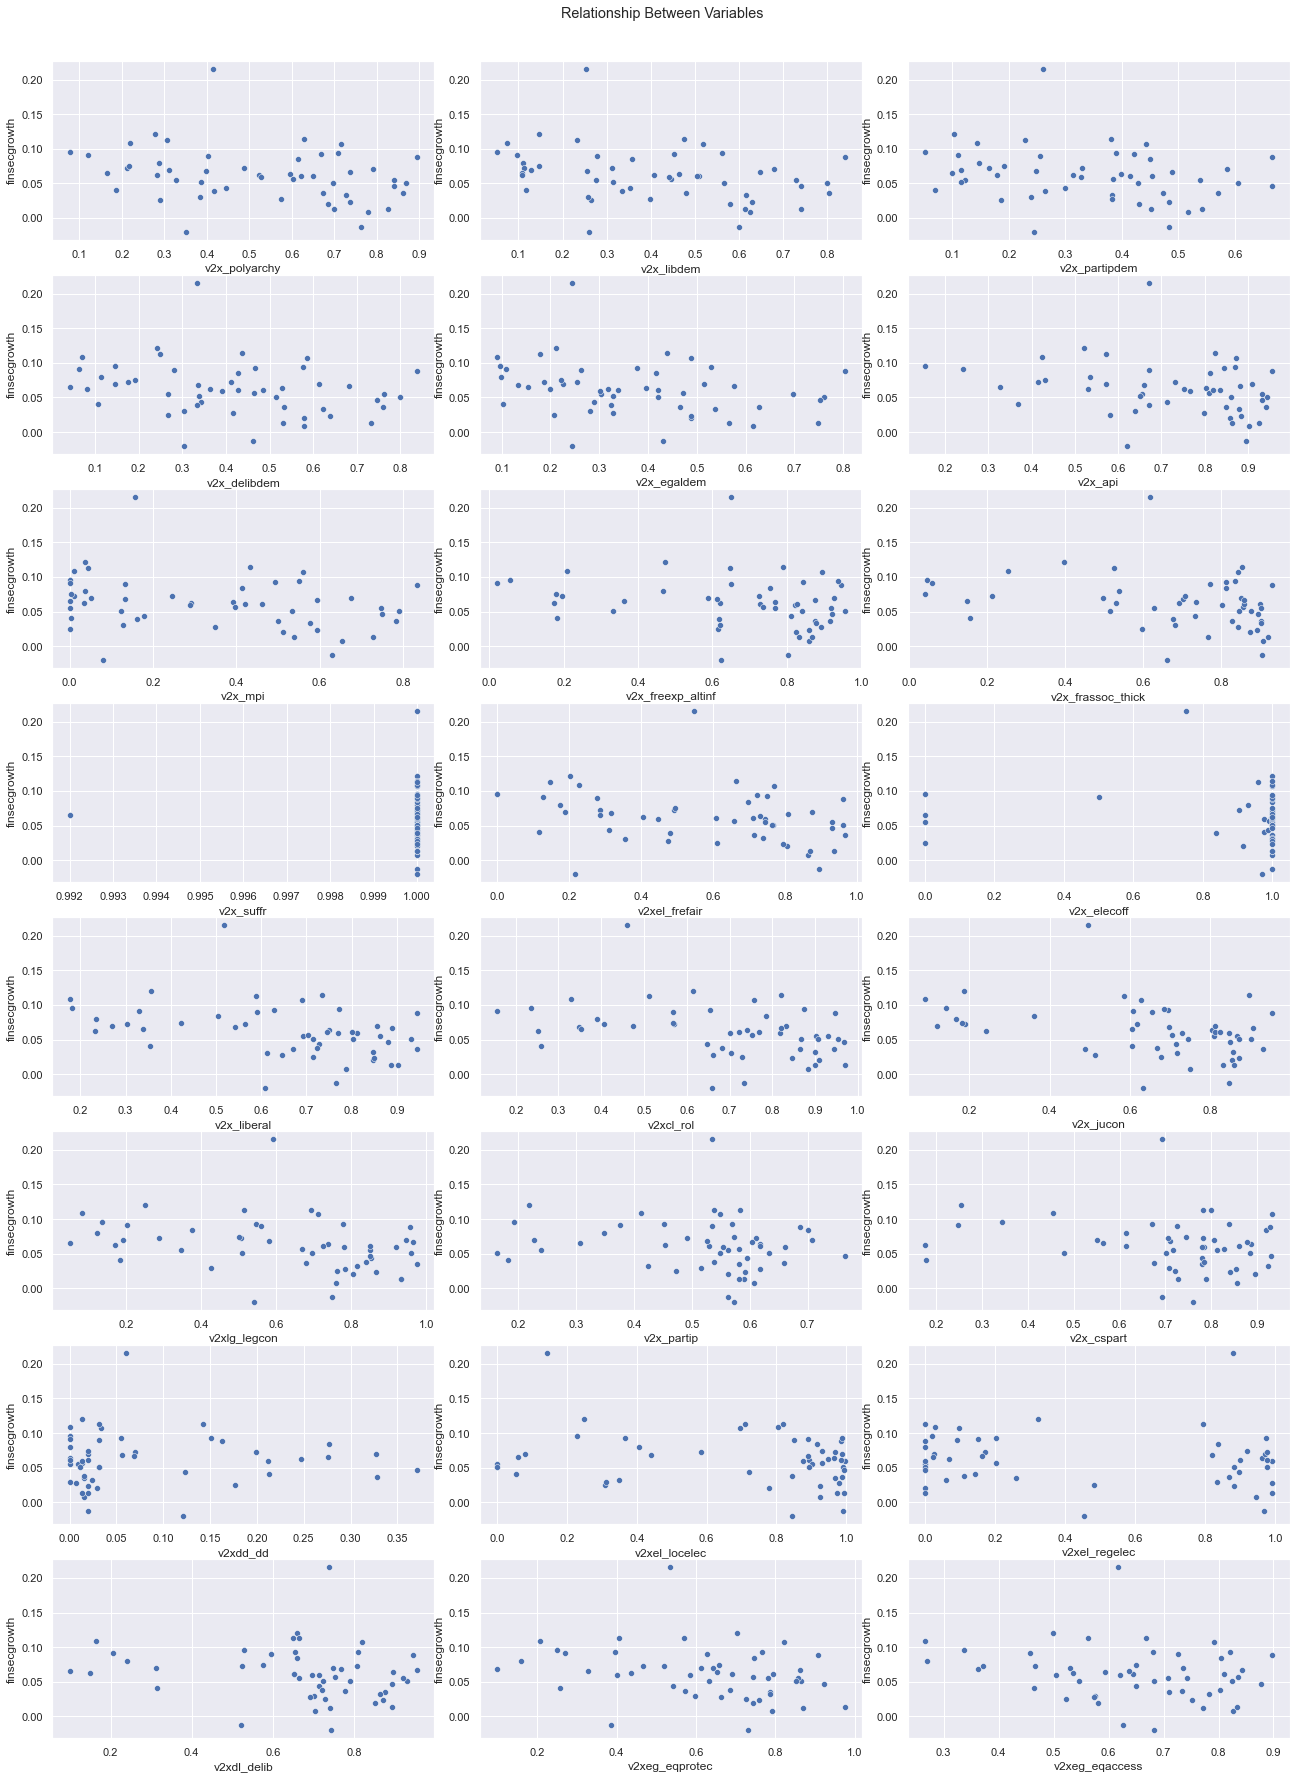

In [9]:
fig, axes = plt.subplots(8, 3, figsize=(18, 25))
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Relationship Between Variables')
sns.scatterplot(ax=axes[0, 0], data=dta, x='v2x_polyarchy', y='finsecgrowth')
sns.scatterplot(ax=axes[0, 1], data=dta, x='v2x_libdem', y='finsecgrowth')
sns.scatterplot(ax=axes[0, 2], data=dta, x='v2x_partipdem', y='finsecgrowth')
sns.scatterplot(ax=axes[1, 0], data=dta, x='v2x_delibdem', y='finsecgrowth')
sns.scatterplot(ax=axes[1, 1], data=dta, x='v2x_egaldem', y='finsecgrowth')
sns.scatterplot(ax=axes[1, 2], data=dta, x='v2x_api', y='finsecgrowth')
sns.scatterplot(ax=axes[2, 0], data=dta, x='v2x_mpi', y='finsecgrowth')
sns.scatterplot(ax=axes[2, 1], data=dta, x='v2x_freexp_altinf', y='finsecgrowth')
sns.scatterplot(ax=axes[2, 2], data=dta, x='v2x_frassoc_thick', y='finsecgrowth')
sns.scatterplot(ax=axes[3, 0], data=dta, x='v2x_suffr', y='finsecgrowth')
sns.scatterplot(ax=axes[3, 1], data=dta, x='v2xel_frefair', y='finsecgrowth')
sns.scatterplot(ax=axes[3, 2], data=dta, x='v2x_elecoff', y='finsecgrowth')
sns.scatterplot(ax=axes[4, 0], data=dta, x='v2x_liberal', y='finsecgrowth')
sns.scatterplot(ax=axes[4, 1], data=dta, x='v2xcl_rol', y='finsecgrowth')
sns.scatterplot(ax=axes[4, 2], data=dta, x='v2x_jucon', y='finsecgrowth')
sns.scatterplot(ax=axes[5, 0], data=dta, x='v2xlg_legcon', y='finsecgrowth')
sns.scatterplot(ax=axes[5, 1], data=dta, x='v2x_partip', y='finsecgrowth')
sns.scatterplot(ax=axes[5, 2], data=dta, x='v2x_cspart', y='finsecgrowth')
sns.scatterplot(ax=axes[6, 0], data=dta, x='v2xdd_dd', y='finsecgrowth')
sns.scatterplot(ax=axes[6, 1], data=dta, x='v2xel_locelec', y='finsecgrowth')
sns.scatterplot(ax=axes[6, 2], data=dta, x='v2xel_regelec', y='finsecgrowth')
sns.scatterplot(ax=axes[7, 0], data=dta, x='v2xdl_delib', y='finsecgrowth')
sns.scatterplot(ax=axes[7, 1], data=dta, x='v2xeg_eqprotec', y='finsecgrowth')
sns.scatterplot(ax=axes[7, 2], data=dta, x='v2xeg_eqaccess', y='finsecgrowth')


## Visualizing Missingness

<AxesSubplot:>

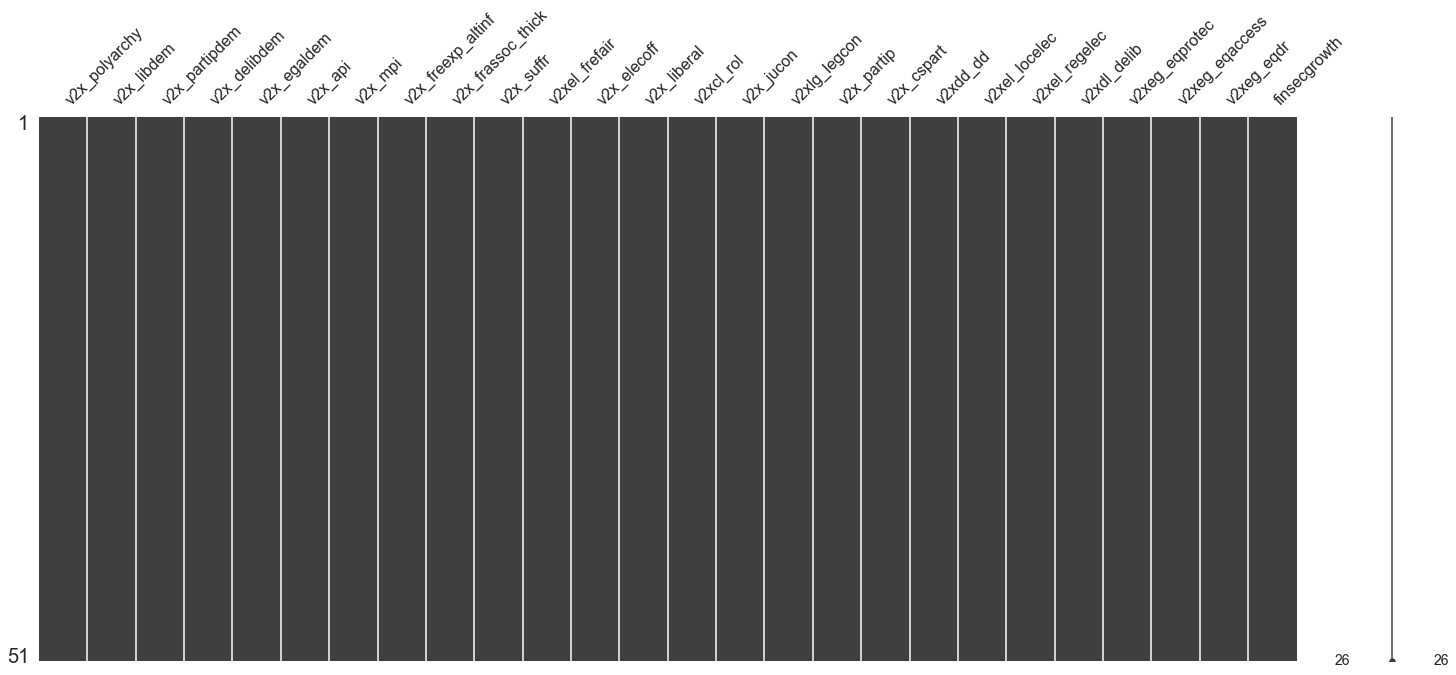

In [10]:
miss.matrix(dta)

## Splitting the Data

In [11]:
# Splitting the data

y = dta[['finsecgrowth']]
X = dta.drop(columns=['finsecgrowth'])

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=202011)


In [12]:
# Examining the split

print(train_X.shape[0]/dta.shape[0])
print(test_X.shape[0]/dta.shape[0])

0.7450980392156863
0.2549019607843137


In [13]:
# Examining the split

train_X

,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_api,v2x_mpi,v2x_freexp_altinf,v2x_frassoc_thick,v2x_suffr,...,v2xlg_legcon,v2x_partip,v2x_cspart,v2xdd_dd,v2xel_locelec,v2xel_regelec,v2xdl_delib,v2xeg_eqprotec,v2xeg_eqaccess,v2xeg_eqdr
45,0.840,0.741,0.666,0.746,0.753,0.932,0.749,0.921,0.894,1.000,...,0.850,0.764,0.930,0.371,0.995,0.000,0.895,0.924,0.877,0.956
38,0.488,0.312,0.329,0.411,0.255,0.732,0.245,0.726,0.707,1.000,...,0.505,0.611,0.781,0.070,0.967,0.978,0.809,0.466,0.466,0.332
34,0.574,0.398,0.382,0.417,0.328,0.799,0.348,0.893,0.843,1.000,...,0.784,0.618,0.853,0.007,0.979,0.992,0.693,0.662,0.574,0.269
28,0.414,0.254,0.261,0.335,0.245,0.671,0.158,0.649,0.617,1.000,...,0.591,0.535,0.693,0.060,0.142,0.879,0.738,0.535,0.618,0.314
20,0.445,0.352,0.299,0.344,0.290,0.713,0.178,0.812,0.734,1.000,...,0.852,0.596,0.780,0.123,0.722,0.898,0.714,0.542,0.649,0.514
16,0.597,0.463,0.398,0.528,0.396,0.802,0.392,0.769,0.735,1.000,...,0.738,0.618,0.887,0.000,0.965,0.963,0.896,0.654,0.594,0.600
14,0.728,0.615,0.383,0.623,0.538,0.878,0.578,0.880,0.901,1.000,...,0.816,0.425,0.923,0.024,0.350,0.059,0.865,0.787,0.782,0.566
12,0.186,0.118,0.070,0.107,0.103,0.368,0.003,0.183,0.156,1.000,...,0.184,0.183,0.178,0.213,0.053,0.143,0.314,0.258,0.464,0.152
3,0.614,0.357,0.450,0.428,0.417,0.813,0.415,0.755,0.813,1.000,...,0.375,0.701,0.919,0.277,0.916,0.836,0.661,0.747,0.804,0.356
17,0.522,0.408,0.313,0.364,0.317,0.752,0.292,0.620,0.691,1.000,...,0.725,0.530,0.615,0.000,0.894,0.977,0.653,0.691,0.644,0.282


In [14]:
train_X.dtypes

v2x_polyarchy        float64
v2x_libdem           float64
v2x_partipdem        float64
v2x_delibdem         float64
v2x_egaldem          float64
v2x_api              float64
v2x_mpi              float64
v2x_freexp_altinf    float64
v2x_frassoc_thick    float64
v2x_suffr            float64
v2xel_frefair        float64
v2x_elecoff          float64
v2x_liberal          float64
v2xcl_rol            float64
v2x_jucon            float64
v2xlg_legcon         float64
v2x_partip           float64
v2x_cspart           float64
v2xdd_dd             float64
v2xel_locelec        float64
v2xel_regelec        float64
v2xdl_delib          float64
v2xeg_eqprotec       float64
v2xeg_eqaccess       float64
v2xeg_eqdr           float64
dtype: object

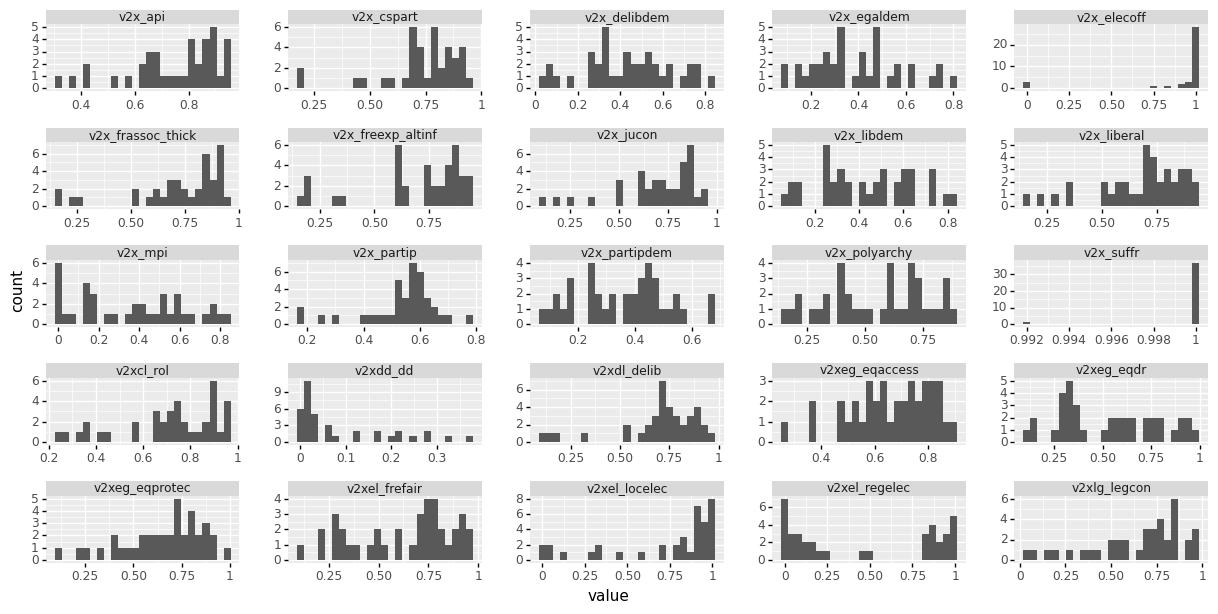

<ggplot: (158998679420)>

In [15]:
# Taking a peak at the distribution of data for continuous variables

d = train_X.select_dtypes(include="float64").melt()

(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(15,7),
          subplots_adjust={'wspace':0.25, 'hspace':0.75})
)

## Training the Model

Cross Validation

In [16]:
# Adding a K-fold cross-validation with 10 folds

fold_generator = KFold(n_splits=10, shuffle=True,random_state=117)


#### Initializing the Pipeline
Scaling will take place in the pipeline.

In [17]:
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

## Select Model and Tuning Params

In [18]:

search_space = [
    
    # Linear Model
    {'model' : [LM()]},
    
    # NaiveBayes
    #{'model': [NB()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[5,10,25,50]},
    
    # Decision Tree with the Max Depth Param
    #{'model': [DT()],
    # 'model__max_depth':[2,3,4]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
    'model__max_depth':[2,3,4],
    'model__n_estimators':[500,1000,1500]}
    
]

## Run the Models

In [19]:
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

In [20]:
search.fit(train_X,train_y.finsecgrowth)

GridSearchCV(cv=KFold(n_splits=10, random_state=117, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [KNeighborsRegressor(n_neighbors=25)],
                          'model__n_neighbors': [5, 10, 25, 50]},
                         {'model': [RandomForestRegressor()],
                          'model__max_depth': [2, 3, 4],
                          'model__n_estimators': [500, 1000, 1500]}],
             scoring='neg_mean_squared_error')

In [21]:
search.best_score_

-0.0015676939357615136

In [22]:
search.best_params_

{'model': KNeighborsRegressor(n_neighbors=25), 'model__n_neighbors': 25}

In [23]:
rf_mod = search.best_estimator_

In [24]:
rf_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model', KNeighborsRegressor(n_neighbors=25))])

## Test Performance

In [25]:
# Predict() method will use the best model out of the scan
pred_y = search.predict(test_X)

In [26]:
m.mean_squared_error(test_y,pred_y)

0.0013219406068232292

In [27]:
m.r2_score(test_y,pred_y)

-2.0961046591453276

In [28]:
m.explained_variance_score(test_y, pred_y)

0.10302734719389095

### Visualize

In [29]:
pred_y

array([0.0530943 , 0.04981079, 0.0462607 , 0.05892813, 0.0462607 ,
       0.06277389, 0.05198423, 0.06373068, 0.06116964, 0.06141099,
       0.06088272, 0.06373068, 0.04695438])

In [30]:
pred_y = pd.DataFrame(pred_y)

In [31]:
pred_y = pred_y.rename(columns={'finsecgrowth': 'prediction'})

In [32]:
pred_y

,0
0,0.053094
1,0.049811
2,0.046261
3,0.058928
4,0.046261
5,0.062774
6,0.051984
7,0.063731
8,0.061170
9,0.061411


In [33]:
test_y = test_y.rename(columns={'finsecgrowth': 'truth'})

In [34]:
test_y

,truth
31,0.059421
24,0.113720
37,0.070069
23,0.091400
22,0.050926
13,0.120875
27,0.092911
2,0.079621
47,0.112682
8,0.069623


In [35]:
pred_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)



In [36]:
newdf = pred_y.join(test_y, how='outer')

In [37]:
newdf

,0,truth
0,0.053094,0.059421
1,0.049811,0.113720
2,0.046261,0.070069
3,0.058928,0.091400
4,0.046261,0.050926
5,0.062774,0.120875
6,0.051984,0.092911
7,0.063731,0.079621
8,0.061170,0.112682
9,0.061411,0.069623


In [38]:

newdf.rename( columns={0 :'prediction'}, inplace=True )

In [39]:
newdf

,prediction,truth
0,0.053094,0.059421
1,0.049811,0.113720
2,0.046261,0.070069
3,0.058928,0.091400
4,0.046261,0.050926
5,0.062774,0.120875
6,0.051984,0.092911
7,0.063731,0.079621
8,0.061170,0.112682
9,0.061411,0.069623


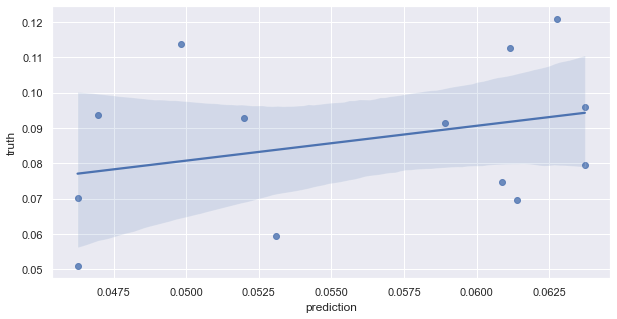

In [40]:
plt.figure(figsize=(10, 5))
sns.regplot(x= "prediction", y="truth", data=newdf)
plt.savefig('pred-truth.png', dpi=300)
plt.show()

## Permutation Importance

Permute the features to determine importance.

In [41]:
vi = permutation_importance(rf_mod,train_X,train_y,n_repeats=25)

Organize output as a DF.

In [42]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,v2x_jucon,0.008191,0.005538,-0.002884,0.019266
1,v2xcl_rol,0.003556,0.010838,-0.018119,0.025232
2,v2xeg_eqdr,0.000113,0.007156,-0.014199,0.014426
3,v2x_suffr,0.000012,0.000057,-0.000102,0.000126
4,v2x_cspart,-0.000946,0.005336,-0.011617,0.009726
5,v2x_liberal,-0.001716,0.006147,-0.014011,0.010578
6,v2x_elecoff,-0.001885,0.002264,-0.006413,0.002643
7,v2xel_locelec,-0.003171,0.009139,-0.021448,0.015106
8,v2xlg_legcon,-0.003396,0.005222,-0.013841,0.007049
9,v2x_frassoc_thick,-0.003548,0.006275,-0.016099,0.009003


Visualize

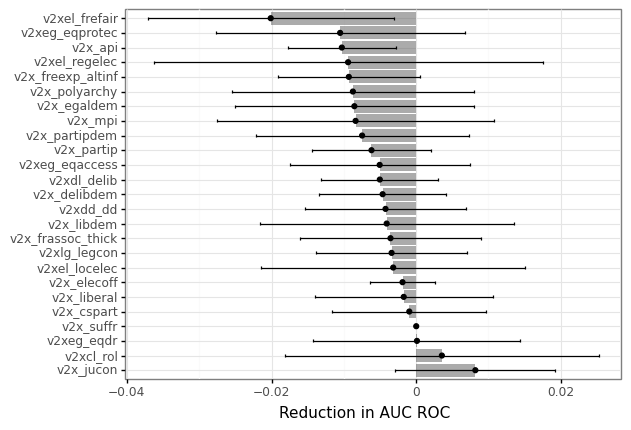

<ggplot: (158999716747)>

In [43]:
# Plot
(
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)